In [1]:
import numpy as np
import pandas as pd

import json
import folium

### 시각화 모듈
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

### 사용 데이터

In [35]:
# Data Load
use_facility = pd.read_csv('./주 이용 운동 장소.csv',skiprows=[0])
use_facility2 = pd.read_csv('./생활권 주변 이용하고 싶은 체육시설.csv',skiprows=[0])

disabled_pop_2021 = pd.read_excel('./장애인_등록_현황(2021년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(장애정도)현황',skiprows=[0,1,2,3])

geo_str = json.load(open("./busan_gu.json", encoding='utf-8'))

elderly_gu = pd.read_csv('./구·군별_고령인구_65세_이상__및_구성비_20221117230025.csv', encoding = 'cp949')

disabled_pop_2017 = pd.read_excel('./장애인_등록_현황(2017년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(등급)현황',skiprows=[0,1,2,3])
disabled_pop_2018 = pd.read_excel('./장애인_등록_현황(2018년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(등급)현황',skiprows=[0,1,2,3])
disabled_pop_2019 = pd.read_excel('./장애인_등록_현황(2019년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(장애정도)현황',skiprows=[0,1,2,3])
disabled_pop_2020 = pd.read_excel('./장애인_등록_현황(2020년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(장애정도)현황',skiprows=[0,1,2,3])
disabled_pop_2021 = pd.read_excel('./장애인_등록_현황(2021년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(장애정도)현황',skiprows=[0,1,2,3])

elderly = pd.read_csv('./고령인구비율_시도_시_군_구__20221116174617.csv', encoding = 'cp949')

disabled_pop_2010 = pd.read_excel('./장애인_등록_현황(2010년_12월_기준).xlsx', sheet_name='2-3.232개 시군구 연령별 장애인(등급)현황',skiprows=[0,1])
disabled_pop_2012 = pd.read_excel('./장애인_등록_현황(2012년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(등급)현황',skiprows=[0,1,2,3,4,5])
disabled_pop_2013 = pd.read_excel('./장애인_등록_현황(2013년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(등급) 현황',skiprows=[0,1,2,3,4,5])
disabled_pop_2014 = pd.read_excel('./장애인_등록_현황(2014년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(등급) 현황',skiprows=[0,1,2,3,4,5])
disabled_pop_2015 = pd.read_excel('./장애인_등록_현황(2015년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(등급) 현황',skiprows=[0,1,2,3,4,5])
disabled_pop_2016 = pd.read_excel('./장애인_등록_현황(2016년_12월_기준).xlsx', sheet_name='2-3.시군구 연령별 장애인(등급) 현황',skiprows=[0,1,2,3,4,5])

facility = pd.read_csv('./장애인스포츠강좌이용권시설정보.csv')

course = pd.read_csv('종목별장애인스포츠활성정보.csv')

busan_facility_top5 = pd.read_excel('./top5구.xlsx')

ctg = pd.read_excel('장애인_등록_현황(2021년_12월_기준).xlsx',sheet_name='4-2.장애유형에 대한 시군구 장애인 현황',skiprows=4)

### 사회적 배경 및 문제인식

#### 장애인 스포츠시설 이용률 - 2020, 2021

##### 전처리

In [23]:
use_facility2021 = use_facility.iloc[:,2:10]
use_facility2021 = use_facility2021.loc[[0]]
use_facility2021.columns = ['공용·공공 체육시설', '장애인 전용 공공 체육시설', '민간 체육시설', '학교/직장 체육시설', '기타 시설', '체육시설 이용하지 않음', '집안', '야외 등산로/공원']

use_facility2020 = use_facility.iloc[:,10:18]
use_facility2020 = use_facility2020.loc[[0]]
use_facility2020.columns = ['공용·공공 체육시설', '장애인 전용 공공 체육시설', '민간 체육시설', '학교/직장 체육시설', '기타 시설', '체육시설 이용하지 않음', '집안', '야외 등산로/공원']

use_facility = pd.concat([use_facility2021, use_facility2020])

use_facility = use_facility.drop(['체육시설 이용하지 않음'], axis=1) 
use_facility.insert(0,'년도',['2021','2020'])  

use_facility= use_facility.T.reset_index()
use_facility = use_facility.drop([0])
use_facility.columns = ['장소','2021','2020']
use_facility

,장소,2021,2020
1,공용·공공 체육시설,6.1,4.6
2,장애인 전용 공공 체육시설,2.3,1.3
3,민간 체육시설,3.9,5.4
4,학교/직장 체육시설,1.4,0.9
5,기타 시설,0.8,0.7
6,집안,14.0,8.2
7,야외 등산로/공원,39.7,31.8


In [24]:
use_facility_20 = use_facility[['장소','2020']]
use_facility_21 = use_facility[['장소','2021']]
use_facility_20_21 = pd.concat([use_facility_20, use_facility_21])

use_facility_20_21=use_facility_20_21.fillna(0)
use_facility_20_21['20_21'] = use_facility_20_21['2020'] + use_facility_20_21['2021']
use_facility_20_21 = use_facility_20_21[['장소','20_21']]
use_facility_20_21['년도'] = [20,20,20,20,20,20,20,21,21,21,21,21,21,21]
use_facility_20_21.columns = ['장소','이용률','년도']
use_facility_20_21

,장소,이용률,년도
1,공용·공공 체육시설,4.6,20
2,장애인 전용 공공 체육시설,1.3,20
3,민간 체육시설,5.4,20
4,학교/직장 체육시설,0.9,20
5,기타 시설,0.7,20
6,집안,8.2,20
7,야외 등산로/공원,31.8,20
1,공용·공공 체육시설,6.1,21
2,장애인 전용 공공 체육시설,2.3,21
3,민간 체육시설,3.9,21


##### 시각화

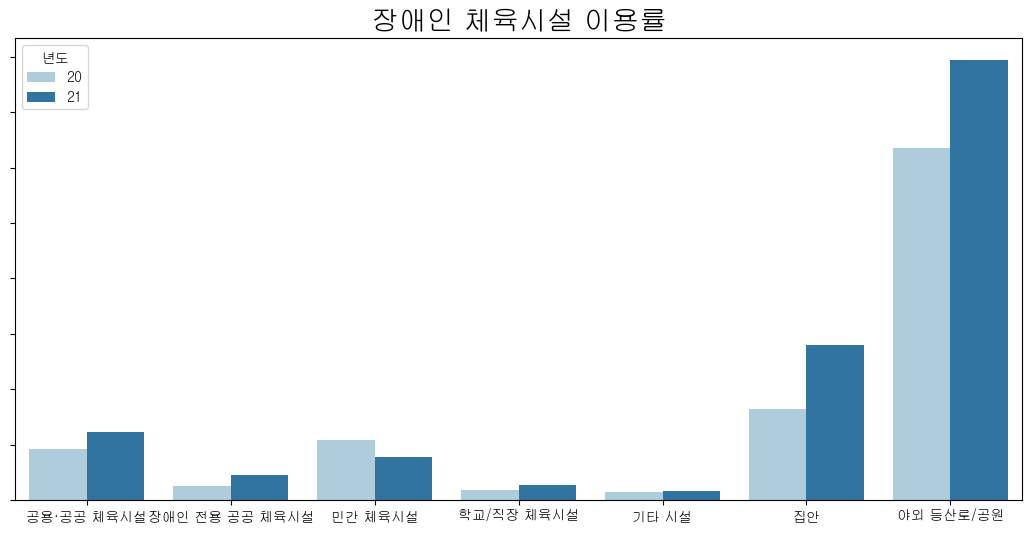

In [25]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


fig = plt.figure(figsize=(13,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
sns.set_palette('Paired')
sns.barplot(x="장소", y="이용률", hue="년도", data=use_facility_20_21)
plt.ylabel("")
plt.xlabel("")
ax.set_yticklabels([])
plt.title('장애인 체육시설 이용률',fontsize=20)
plt.show()

#### 생활권 주변 이용하고 싶은 체육시설 - 2021

##### 전처리

In [26]:
use_facility2021_2 = use_facility2.iloc[:,2:7]
use_facility2021_2 = use_facility2021_2.loc[[0]]
use_facility2021_2.columns = ['공용·공공 체육시설', '장애인 전용 공공 체육시설', '민간 체육시설', '학교/직장 체육시설', '기타 시설']
use_facility2021_2.insert(0,'년도',['2021'])  

use_facility2021_2 = use_facility2021_2.transpose()
use_facility2021_2 = use_facility2021_2.reset_index()
use_facility2021_2 = use_facility2021_2[1:]
use_facility2021_2.columns = ['시설','비율']
use_facility2021_2

,시설,비율
1,공용·공공 체육시설,35.2
2,장애인 전용 공공 체육시설,34.1
3,민간 체육시설,13.7
4,학교/직장 체육시설,5.1
5,기타 시설,11.9


##### 시각화

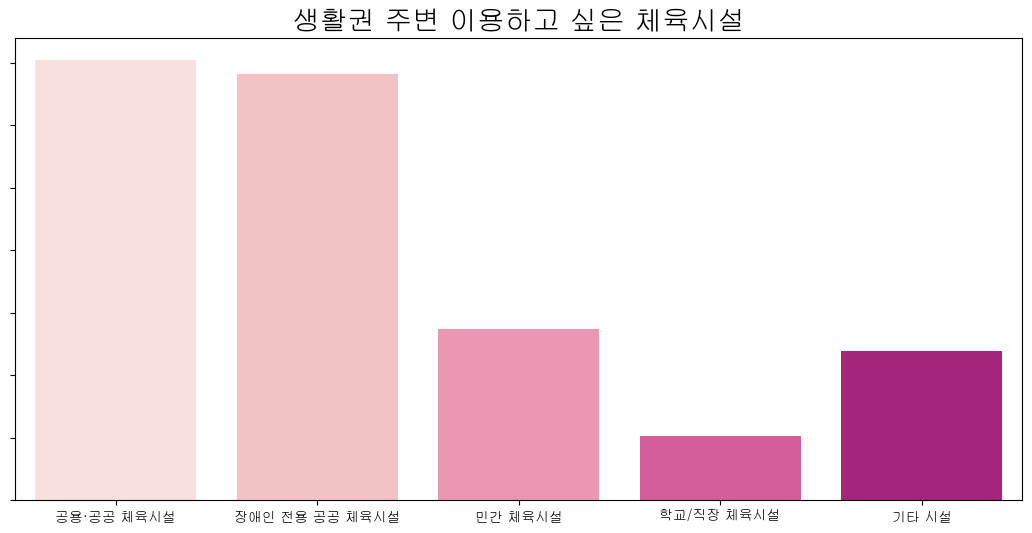

In [27]:
fig = plt.figure(figsize=(13,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

sns.set_palette('RdPu')
sns.barplot(x="시설", y="비율", data=use_facility2021_2)
plt.ylabel("")
plt.xlabel("")
ax.set_yticklabels([])
plt.title('생활권 주변 이용하고 싶은 체육시설',fontsize=20)
plt.show()

### 분석

#### 부산광역시 구별 장애인 인구수

##### 전처리

In [36]:
disabled_pop_2021_1 = disabled_pop_2021.copy()

disabled_pop_2021_2 = disabled_pop_2021_1.iloc[:,[0,1,2,11]].drop([0,1], axis=0)
disabled_pop_2021_2 = disabled_pop_2021_2.rename(columns={'Unnamed: 11':'합계'})

### 부산광역시 구별 장애인 인구수 추출
busan = disabled_pop_2021_2[disabled_pop_2021_2['시도'] == '부산광역시']
busan = busan[busan['나이']=='소계'].drop([2599], axis=0)
busan = busan[['시군구','합계']]
busan = busan.astype({'합계':int}).reset_index(drop=True)
busan = busan.sort_values(by=['합계'], ascending=True)

# 부산광역시 구별 장애인인구수 내림차순 정렬 - 장애인인구수 많은 지역 파악
busan.sort_values(by=['합계'], ascending=False)

,시군구,합계
4,부산진구,18601
9,사하구,17881
8,해운대구,17726
7,북구,16179
14,사상구,13451
6,남구,13101
10,금정구,11694
5,동래구,11680
12,연제구,9879
3,영도구,9019


##### 시각화

In [37]:
# 구별 장애인 인구수 분포 지도
busan_disabled = busan.set_index('시군구',drop=False)

map = folium.Map(location = [35.1856505,129.1], zoom_start=10, tiles = 'Stamen Terrain')
map.choropleth(geo_data = geo_str, 
              data = busan_disabled['합계'],
              columns = busan_disabled['합계'],
              fill_color = 'RdPu',
              key_on = "feature.id",
              legend_name = '구 별 장애인 수', 
              tiles = 'Stamen Terrain')

map

c:\Users\woo\anaconda3\lib\site-packages\folium\folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


C:\Users\woo\AppData\Local\Temp\ipykernel_19080\3964959510.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','2,500', '5,000', '7,500', '10,000', '12,500','15,000','17,500'], fontsize=12)


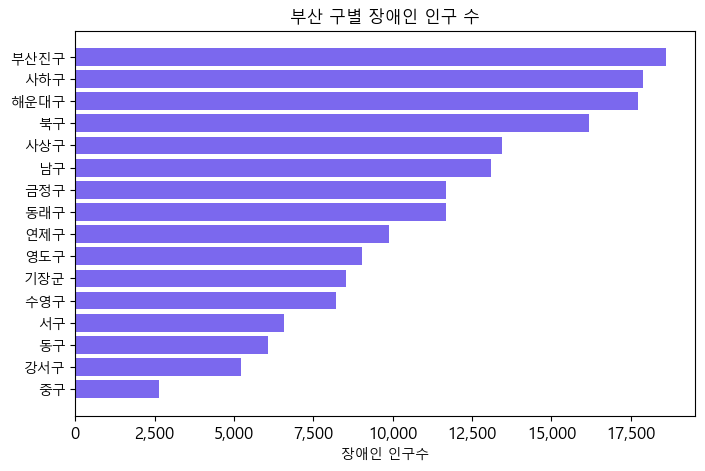

In [38]:
# 구별 장애인 인구수 막대그래프

#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

fig = plt.figure(figsize=(8,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

x= busan['시군구']
y=busan['합계']
plt.title('부산 구별 장애인 인구 수')
plt.xlabel('장애인 인구수')
plt.barh(x,y, color="mediumslateblue")
ax.set_xticklabels(['0','2,500', '5,000', '7,500', '10,000', '12,500','15,000','17,500'], fontsize=12)
plt.show()

#### 부산광역시 구별 고령 인구수

##### 전처리

In [31]:
elderly_gu = elderly_gu[elderly_gu['고령인구별(1)']=="계"]
elderly_gu = elderly_gu[['구군별(1)','2021']]
elderly_gu.columns = ['시군구', '구별_고령인구수']
elderly_gu = elderly_gu[1:][:].reset_index(drop=True)
elderly_gu = elderly_gu.astype({'구별_고령인구수':'int'})
elderly_gu = elderly_gu.sort_values('구별_고령인구수', ascending = True)
elderly_gu.sort_values('구별_고령인구수', ascending = False)

,시군구,구별_고령인구수
4,부산진구,71665
8,해운대구,69872
9,사하구,59516
6,남구,54461
7,북구,50652
5,동래구,49945
10,금정구,49032
14,사상구,39550
12,연제구,38303
13,수영구,38143


##### 시각화

C:\Users\woo\AppData\Local\Temp\ipykernel_19080\3812839370.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','10,000', '20,000','30,000','40,000','50,000','60,000','70,000'], fontsize=12)


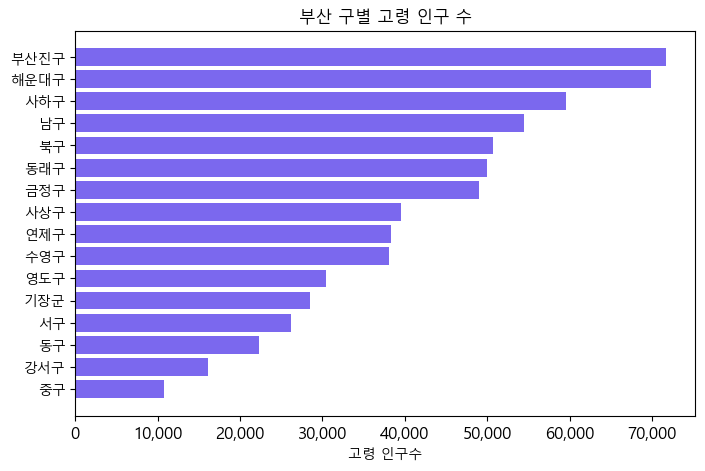

In [32]:
# 구별 고령 인구수 막대그래프

#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝


fig = plt.figure(figsize=(8,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

x= elderly_gu['시군구']
y=elderly_gu['구별_고령인구수']
plt.title('부산 구별 고령 인구 수')
plt.xlabel('고령 인구수')
plt.barh(x,y, color="mediumslateblue")
ax.set_xticklabels(['0','10,000', '20,000','30,000','40,000','50,000','60,000','70,000'], fontsize=12)
plt.show()

#### 부산광역시 년도별 장애인 및 고령인구수

##### 전처리

In [39]:
# 부산광역시 년도별 장애인 인구수
#2017
disabled_pop_2017 = disabled_pop_2017[(disabled_pop_2017["시군구"] == "소계") | (disabled_pop_2017["시군구"] == "합계")]
disabled_pop_2017 = disabled_pop_2017[['시도','합계']]
disabled_pop_2017 = disabled_pop_2017[disabled_pop_2017['시도']=="부산광역시"]
disabled_pop_2017 = disabled_pop_2017.reset_index(drop=True)

#2018
disabled_pop_2018 = disabled_pop_2018[(disabled_pop_2018["시군구"] == "소계") | (disabled_pop_2018["시군구"] == "합계")]
disabled_pop_2018 = disabled_pop_2018[['시도','합계']]
disabled_pop_2018 = disabled_pop_2018[disabled_pop_2018['시도']=="부산광역시"]
disabled_pop_2018 = disabled_pop_2018.reset_index(drop=True)

#2019
disabled_pop_2019 = disabled_pop_2019[(disabled_pop_2019["시군구"] == "소계")| (disabled_pop_2019["시군구"] == "합계")]
disabled_pop_2019 = disabled_pop_2019[['시도','Unnamed: 11']]
disabled_pop_2019 = disabled_pop_2019.rename(columns = {'Unnamed: 11':'합계'})
disabled_pop_2019 = disabled_pop_2019[disabled_pop_2019['시도']=="부산광역시"]
disabled_pop_2019 = disabled_pop_2019.reset_index(drop=True)

#2020
disabled_pop_2020 = disabled_pop_2020[(disabled_pop_2020["시군구"] == "소계")| (disabled_pop_2020["시군구"] == "합계")]
disabled_pop_2020 = disabled_pop_2020[['시도','Unnamed: 11']]
disabled_pop_2020 = disabled_pop_2020.rename(columns = {'Unnamed: 11':'합계'})
disabled_pop_2020 = disabled_pop_2020[disabled_pop_2020['시도']=="부산광역시"]
disabled_pop_2020 = disabled_pop_2020.reset_index(drop=True)

#2021
disabled_pop_2021 = disabled_pop_2021[(disabled_pop_2021["시군구"] == "소계")| (disabled_pop_2021["시군구"] == "합계")]
disabled_pop_2021 = disabled_pop_2021[['시도','Unnamed: 11']]
disabled_pop_2021 = disabled_pop_2021.rename(columns = {'Unnamed: 11':'합계'})
disabled_pop_2021 = disabled_pop_2021[disabled_pop_2021['시도']=="부산광역시"]
disabled_pop_2021 = disabled_pop_2021.reset_index(drop=True)



all_disabled_pop = pd.concat([disabled_pop_2017,disabled_pop_2018,disabled_pop_2019,disabled_pop_2020,disabled_pop_2021])

all_disabled_pop['시도'] = [2017,2018,2019,2020,2021]
all_disabled_pop_year = all_disabled_pop.rename(columns = {'시도':'년도','합계':'장애인인구수'})
all_disabled_pop_year = all_disabled_pop_year.astype({'년도':'int'})
all_disabled_pop_year = all_disabled_pop_year.astype({'장애인인구수':'int'})
all_disabled_pop_year = all_disabled_pop_year.reset_index(drop=True)
all_disabled_pop_year

,년도,장애인인구수
0,2017,171384
1,2018,173820
2,2019,175378
3,2020,176293
4,2021,176451


In [40]:
# 부산광역시 년도별 고령 인구수
elderly = elderly[['행정구역별(1)','2017.1', '2018.1', '2019.1', '2020.1', '2021.1']]
elderly.columns = ['지역','2017', '2018', '2019', '2020', '2021']
elderly = elderly[1:][:]
elderly = elderly[elderly['지역']=='부산광역시']

elderly = elderly.transpose().reset_index()
elderly = elderly[1:][:]
elderly.columns = ['년도','고령인구수']
elderly

,년도,고령인구수
1,2017,565527
2,2018,589961
3,2019,620123
4,2020,657711
5,2021,681885


In [41]:
# 부산광역시 년도별 장애인 인구수 및 고령 인구수 하나의 데이터프레임으로 나타내기 
all_disabled_pop_old = all_disabled_pop_year.copy()
all_disabled_pop_old['고령인구수'] = [565527, 589961, 620123, 657711, 681885]
all_disabled_pop_old

,년도,장애인인구수,고령인구수
0,2017,171384,565527
1,2018,173820,589961
2,2019,175378,620123
3,2020,176293,657711
4,2021,176451,681885


##### 시각화

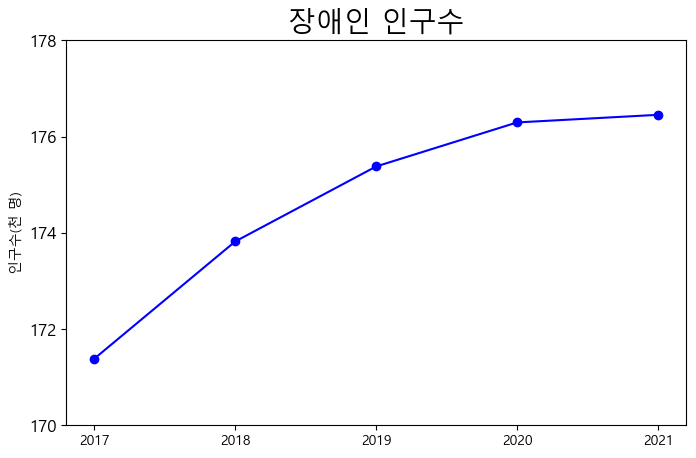

In [42]:
# 장애인 인구수 막대그래프
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(8,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
#sns.set_palette('deep')

disabled_pop_sum = all_disabled_pop_old['장애인인구수']
year = all_disabled_pop_old['년도']
ax.plot(year, disabled_pop_sum, marker='o', color='blue', label = '장애인 인구수')


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yticks([2500000,2550000, 2600000, 2650000 ,2700000])
#ax.set_yticklabels(['250', '255', '260', '265', '270'], fontsize=12)

ax.set_yticks([170000, 172000, 174000, 176000 ,178000])
ax.set_yticklabels(['170', '172', '174', '176', '178'], fontsize=12)
plt.ylabel('인구수(천 명)')
plt.title('장애인 인구수',fontsize=20) 
plt.show()

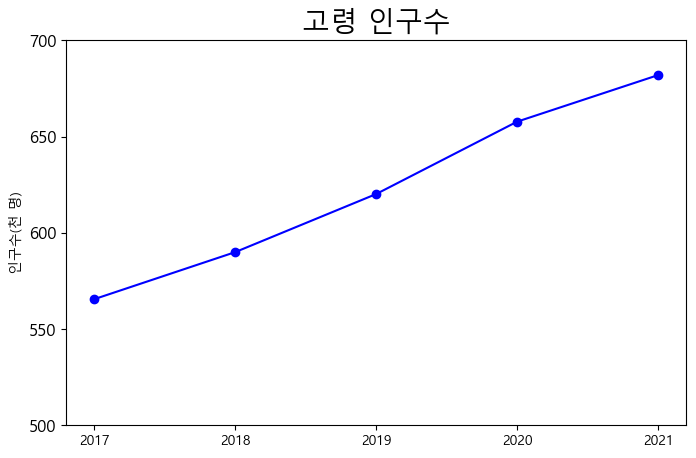

In [43]:
# 고령 인구수 막대그래프
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(8,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

elderly_pop = all_disabled_pop_old['고령인구수']
year = all_disabled_pop_old['년도']
ax.plot(year, elderly_pop, marker='o', color='blue', label = '고령 인구수')


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticks([500000,550000, 600000, 650000 ,700000])
ax.set_yticklabels(['500', '550', '600', '650', '700'], fontsize=12)
plt.ylabel('인구수(천 명)')
plt.title('고령 인구수',fontsize=20) 
plt.show()

#### 부산광역시 장애인 인구수 예측

##### 전처리

In [44]:
# 부산광역시 년도별 장애인 인구수
#2010
disabled_pop_2010 = disabled_pop_2010[(disabled_pop_2010["나이"] == "소계")]
disabled_pop_2010 = disabled_pop_2010[['시도','합계']]
disabled_pop_2010 = disabled_pop_2010[disabled_pop_2010['시도']=="부산광역시"]
disabled_pop_2010 = disabled_pop_2010[-1:][:]
disabled_pop_2010 = disabled_pop_2010.reset_index(drop=True)

#2012
disabled_pop_2012 = disabled_pop_2012[(disabled_pop_2012["나이"] == "소계")]
disabled_pop_2012 = disabled_pop_2012[['시도','합계']]
disabled_pop_2012 = disabled_pop_2012[disabled_pop_2012['시도']=="부산광역시"]
disabled_pop_2012 = disabled_pop_2012.reset_index(drop=True)
disabled_pop_2012 = disabled_pop_2012[:1]

#2013
disabled_pop_2013 = disabled_pop_2013[(disabled_pop_2013["시군구"] == "소계")]
disabled_pop_2013 = disabled_pop_2013[['시도','합계']]
disabled_pop_2013 = disabled_pop_2013[disabled_pop_2013['시도']=="부산광역시"]
disabled_pop_2013 = disabled_pop_2013.reset_index(drop=True)

#2014
disabled_pop_2014 = disabled_pop_2014[(disabled_pop_2014["시군구"] == "소계")]
disabled_pop_2014 = disabled_pop_2014[['시도','합계']]
disabled_pop_2014 = disabled_pop_2014[disabled_pop_2014['시도']=="부산광역시"]
disabled_pop_2014 = disabled_pop_2014.reset_index(drop=True)

#2015
disabled_pop_2015 = disabled_pop_2015[(disabled_pop_2015["시군구"] == "소계")]
disabled_pop_2015 = disabled_pop_2015[['시도','합계']]
disabled_pop_2015 = disabled_pop_2015[disabled_pop_2015['시도']=="부산광역시"]
disabled_pop_2015 = disabled_pop_2015.reset_index(drop=True)

#2016
disabled_pop_2016 = disabled_pop_2016[(disabled_pop_2016["시군구"] == "소계")]
disabled_pop_2016 = disabled_pop_2016[['시도','합계']]
disabled_pop_2016 = disabled_pop_2016[disabled_pop_2016['시도']=="부산광역시"]
disabled_pop_2016 = disabled_pop_2016.reset_index(drop=True)



busan_disabled_pop_old = pd.concat([disabled_pop_2010,disabled_pop_2012,disabled_pop_2013,disabled_pop_2014,disabled_pop_2015,disabled_pop_2016])

busan_disabled_pop_old['시도'] = [2010,2012,2013,2014,2015,2016]
busan_disabled_pop_oldyear = busan_disabled_pop_old.rename(columns = {'시도':'년도','합계':'장애인인구수'})
busan_disabled_pop_oldyear = busan_disabled_pop_oldyear.astype({'장애인인구수':'int'})
busan_disabled_pop_oldyear = busan_disabled_pop_oldyear.astype({'년도':'int'})
busan_disabled_pop_oldyear = busan_disabled_pop_oldyear.reset_index(drop=True)


# 2011년 데이터가 없으므로 2010년과 2012년의 평균으로 대체
busan_disabled_pop_oldyear.loc[6] = [2011, busan_disabled_pop_oldyear.loc[0:1]["장애인인구수"].mean()]
busan_disabled_pop_oldyear = busan_disabled_pop_oldyear.astype(int)
busan_disabled_pop_oldyear = busan_disabled_pop_oldyear.sort_values('년도')
busan_disabled_pop_oldyear = busan_disabled_pop_oldyear.reset_index(drop=True)
busan_disabled_pop_oldyear

,년도,장애인인구수
0,2010,172765
1,2011,171754
2,2012,170743
3,2013,169750
4,2014,168663
5,2015,168084
6,2016,168950


In [45]:
# 부산광역시 년도별 장애인 인구수 데이터 합치기(2010년~2021년)
busan_disabled_pop_year = pd.concat([busan_disabled_pop_oldyear, all_disabled_pop_year])

busan_disabled_pop_year = busan_disabled_pop_year.reset_index(drop=True)
busan_disabled_pop_year

,년도,장애인인구수
0,2010,172765
1,2011,171754
2,2012,170743
3,2013,169750
4,2014,168663
5,2015,168084
6,2016,168950
7,2017,171384
8,2018,173820
9,2019,175378


In [52]:
# 라이브러리 설치 필수
#!pip install prophet

# 분석용 라이브러리 호출 

import pandas as pd 
import prophet
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
import holidays
from datetime import date

In [62]:
busan_disabled_pop_year = busan_disabled_pop_year.rename(columns = {'년도':'ds'})
busan_disabled_pop_year = busan_disabled_pop_year.rename(columns = {'장애인인구수':'y'})

busan_disabled_pop_year['ds']=[
    '2010-12-01','2011-12-01','2012-12-01','2013-12-01','2014-12-01','2015-12-01','2016-12-01',
    '2017-12-01','2018-12-01','2019-12-01','2020-12-01','2021-12-01']

busan_disabled_pop_year

,ds,y
0,2010-12-01,172765
1,2011-12-01,171754
2,2012-12-01,170743
3,2013-12-01,169750
4,2014-12-01,168663
5,2015-12-01,168084
6,2016-12-01,168950
7,2017-12-01,171384
8,2018-12-01,173820
9,2019-12-01,175378


##### 모델 - prophet

참고 : https://ecyy.medium.com/forecasting-by-fb-prophet-in-colab-c9d4db2d4195

In [63]:
df_prophet = busan_disabled_pop_year.copy()
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet

,ds,y
0,2010-12-01,172765
1,2011-12-01,171754
2,2012-12-01,170743
3,2013-12-01,169750
4,2014-12-01,168663
5,2015-12-01,168084
6,2016-12-01,168950
7,2017-12-01,171384
8,2018-12-01,173820
9,2019-12-01,175378


In [64]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      12 non-null     datetime64[ns]
 1   y       12 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 272.0 bytes


In [65]:
# 라이브러리 설치 필수
#!pip install yfinance

# 라이브러리 호출 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from prophet import Prophet

In [66]:
model_prop = Prophet()
model_prop.fit(df_prophet)

18:46:15 - cmdstanpy - INFO - Chain [1] start processing
18:46:23 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
future = model_prop.make_future_dataframe(10, freq='Y')
forecast = model_prop.predict(future)

In [68]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17,2026-12-31,4.348198e+06,4.335287e+06,4.361281e+06
18,2027-12-31,4.370460e+06,4.354232e+06,4.387349e+06
19,2028-12-31,4.301359e+06,4.281292e+06,4.322996e+06
20,2029-12-31,4.327504e+06,4.303492e+06,4.353761e+06
21,2030-12-31,4.351721e+06,4.323700e+06,4.382005e+06


##### 예측 결과 시각화

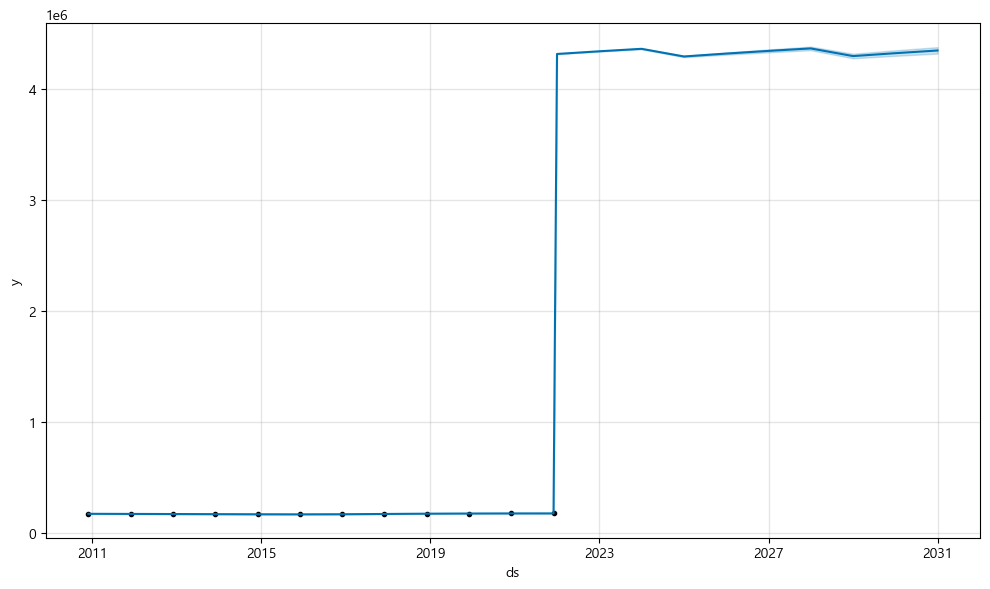

In [69]:
fig1 = model_prop.plot(forecast)

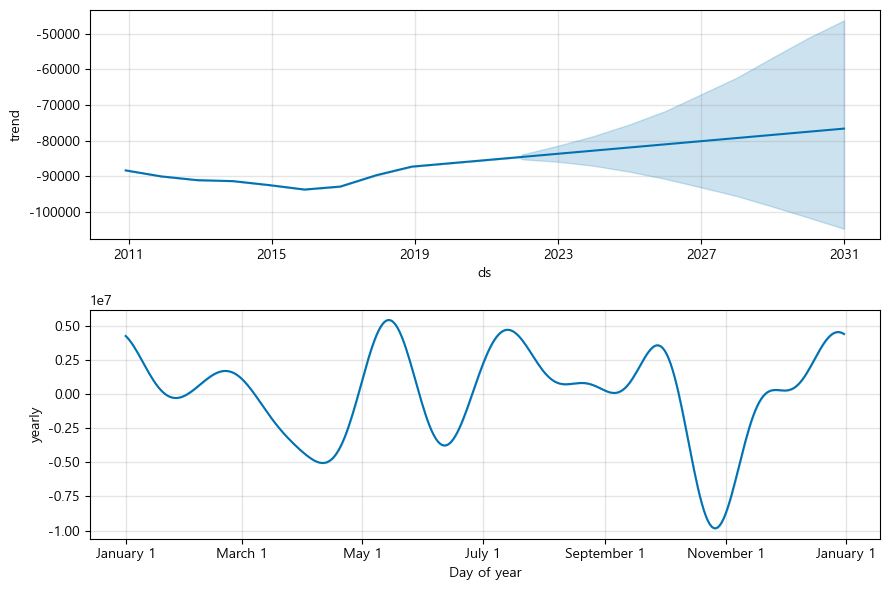

In [70]:
# 시계열의 추세, 연간 계절성 및 주간 계절성이 표시
fig2 = model_prop.plot_components(forecast)

#### 부산광역시 장애인 스포츠시설 위치

##### 전처리

In [71]:
busan_facility_all = facility[(facility['CTPRVN_NM'] == '부산')]
busan_facility_all = busan_facility_all.reset_index(drop=True)

busan_facility = busan_facility_all[['SIGNGU_NM','FCLTY_NM','FCLTY_ADDR','FCLTY_CRDNT_LO','FCLTY_CRDNT_LA']]
busan_facility

,SIGNGU_NM,FCLTY_NM,FCLTY_ADDR,FCLTY_CRDNT_LO,FCLTY_CRDNT_LA
0,사하구,동아대부산체육관 괴정2동,부산광역시 사하구 까치고개로 5,129.003206,35.103421
1,부산진구,동아대박사한결태권도,부산광역시 부산진구 동평로 350,129.063254,35.174537
2,연제구,동아대mba태권도,부산광역시 연제구 연수로 130,129.084510,35.173624
3,북구,동아대 태권도,부산광역시 북구 학사로17번가길 30,129.008505,35.223349
4,북구,대천체육관,부산광역시 북구 양달로 70,129.020801,35.243997
...,...,...,...,...,...
135,해운대구,미라클랜드 휘트니스,부산광역시 해운대구 재반로 239,129.131065,35.198639
136,기장군,행복요가원,부산광역시 기장군 기장읍 차성동로 171,129.217027,35.253256
137,북구,코리아짐,부산광역시 북구 함박봉로7번길 49,129.022708,35.211166
138,수영구,수영구 국민체육센터,부산광역시 수영구 수영로521번길 77,129.107460,35.152938


In [72]:
# 부산광역시 장애인 스포츠강좌 운영 시설 137곳 추출(장애인 전용시설 제외)
busan_facility_137 = busan_facility.drop([busan_facility.index[60],busan_facility.index[68],busan_facility.index[113]])
busan_facility_137

,SIGNGU_NM,FCLTY_NM,FCLTY_ADDR,FCLTY_CRDNT_LO,FCLTY_CRDNT_LA
0,사하구,동아대부산체육관 괴정2동,부산광역시 사하구 까치고개로 5,129.003206,35.103421
1,부산진구,동아대박사한결태권도,부산광역시 부산진구 동평로 350,129.063254,35.174537
2,연제구,동아대mba태권도,부산광역시 연제구 연수로 130,129.084510,35.173624
3,북구,동아대 태권도,부산광역시 북구 학사로17번가길 30,129.008505,35.223349
4,북구,대천체육관,부산광역시 북구 양달로 70,129.020801,35.243997
...,...,...,...,...,...
135,해운대구,미라클랜드 휘트니스,부산광역시 해운대구 재반로 239,129.131065,35.198639
136,기장군,행복요가원,부산광역시 기장군 기장읍 차성동로 171,129.217027,35.253256
137,북구,코리아짐,부산광역시 북구 함박봉로7번길 49,129.022708,35.211166
138,수영구,수영구 국민체육센터,부산광역시 수영구 수영로521번길 77,129.107460,35.152938


In [73]:
# 부산광역시 장애인 전용 스포츠 시설 3곳 추출
busan_facility_3 = busan_facility[(busan_facility['FCLTY_NM']=='해운대한마음스포츠센터') | (busan_facility['FCLTY_NM']=='부산곰두리스포츠센터') | (busan_facility['FCLTY_NM']=='서부산권장애인스포츠센터')]
busan_facility_3

,SIGNGU_NM,FCLTY_NM,FCLTY_ADDR,FCLTY_CRDNT_LO,FCLTY_CRDNT_LA
60,연제구,부산곰두리스포츠센터,부산광역시 연제구 화지로 109,129.065732,35.185239
68,사하구,서부산권장애인스포츠센터,부산광역시 사하구 낙동남로 1233번길 20,128.946942,35.109420
113,해운대구,해운대한마음스포츠센터,"부산광역시 해운대구 세실로 175 (좌동, 한마음스포츠센터)",129.176687,35.180398


In [74]:
# 부산광역시 구별 스포츠강좌운영 시설 개수
busan_facility_cnt = busan_facility.groupby(['SIGNGU_NM']).size().to_frame()
busan_facility_cnt = busan_facility_cnt.reset_index()
busan_facility_cnt.columns = ['SIGNGU_NM','cnt']
busan_facility_cnt = busan_facility_cnt.rename(columns = {'SIGNGU_NM':'구'})
busan_facility_cnt.sort_values(by='cnt' ,ascending=False)

,구,cnt
7,북구,30
15,해운대구,20
3,남구,14
12,연제구,11
5,동래구,10
9,사하구,10
1,금정구,8
6,부산진구,8
0,강서구,6
2,기장군,6


##### 시각화

In [75]:
# 구별 장애인 스포츠시설 위치
map2 = folium.Map(location = [35.1856505,129.1], zoom_start=10, tiles = 'Stamen Terrain')
map2.choropleth(geo_data = geo_str, 
              fill_color = 'grey',
              fill_opacity=0.5,
              key_on = "feature.id")


# Circle = 장애인 스포츠강좌 운영 전용스포츠시설
for i in range(len(busan_facility_137)):
    folium.Circle([busan_facility_137.iloc[i][4], busan_facility_137.iloc[i][3]], popup=busan_facility_137.iloc[i][1], color = 'blue', radius = 50).add_to(map2)    

# Marker = 장애인 스포츠강좌 운영 시설
for i in range(len(busan_facility_3)):
    folium.Marker([busan_facility_3.iloc[i][4], busan_facility_3.iloc[i][3]], popup=busan_facility_3.iloc[i][1], icon = folium.Icon(color = 'purple')).add_to(map2)     
map2

c:\Users\woo\anaconda3\lib\site-packages\folium\folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [76]:
# 구별 장애인 스포츠시설 분포
map3 = folium.Map(location = [35.1856505,129.1], zoom_start=10,tiles = 'Stamen Terrain')
map3.choropleth(geo_data = geo_str, 
              data = busan_facility_cnt,
              columns = ['구','cnt'],
              fill_color = 'RdPu',
              fill_opacity=0.5,
              legend_name = '장애인 스포츠시설 개수',
              key_on = "feature.id")
map3

#### 부산광역시 구별 각 스포츠 시설당 수용 가능 인원

##### 전처리

In [ ]:
busan_facility_cnt.sort_values(by='구' ,ascending=False)


In [ ]:
busan.sort_values(by='시군구' ,ascending=False)

In [77]:
# 각 시설마다 수용 가능한 인구 수 = 부산 구별 장애인 인구수 / 부산 구별 장애인스포츠 시설 수 
busan_1_all = pd.concat([busan, busan_facility_cnt['cnt']],axis=1)
busan_1_all['각 시설당 수용가능 인원'] = (busan_1_all['합계'] / busan_1_all['cnt']).round(0).astype('int')
busan_1_all = busan_1_all[['시군구','합계','각 시설당 수용가능 인원']]
busan_1_all.columns = ['시군구','장애인수','각 시설당 수용가능 인원']
busan_1_all = busan_1_all.reset_index(drop=True)
busan_1_all_13 = busan_1_all.drop(busan_1_all.index[[7,13,14]])  # 장애인전용 스포츠시설이 이미 위치해있는 해운대구, 사하구, 연제구 제외
busan_1_all_13 = busan_1_all_13.reset_index(drop=True)
busan_1_all_13 = busan_1_all_13.sort_values(by=['각 시설당 수용가능 인원'], ascending=False)
busan_1_all_13

,시군구,장애인수,각 시설당 수용가능 인원
12,부산진구,18601,18601
10,사상구,13451,6726
8,금정구,11694,5847
4,수영구,8210,2052
9,남구,13101,1638
7,동래구,11680,1168
2,동구,6076,1013
1,강서구,5223,870
3,서구,6587,823
6,영도구,9019,644


##### 시각화

In [78]:
# 각 시설당 수용 가능인원 분포
busan_1_all_13_2 = busan_1_all_13.set_index('시군구',drop=False)

map4 = folium.Map(location = [35.1856505,129.1], zoom_start=10, tiles = 'Stamen Terrain')
map4.choropleth(geo_data = geo_str, 
              data = busan_1_all_13_2,
              columns = ['시군구', '각 시설당 수용가능 인원'],
              fill_color = 'RdPu',
              key_on = "feature.id",
              legend_name = '각 시설당 수용 가능 인원', 
              tiles = 'Stamen Terrain')
map4

c:\Users\woo\anaconda3\lib\site-packages\folium\folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### 정책 제안

#### 부산광역시 장애인 스포츠 강좌 종목

##### 전처리

In [79]:
# 전국 장애인 스포츠 종목 추출
course = course[['COURSE_ITEM_NM', 'DMAND_MVM_ITEM_LCLAS_NM', 'DMAND_MVM_ITEM_SCLAS_NM','COURSE_ITEM_CO']]
course.columns = ['대분류', '소분류', '종목','cnt']

course = course.sort_values(by='cnt', ascending=False)
course = course.reset_index(drop=True)

course_cnt = course[course['cnt']!=0]
course_cnt_top7 = course_cnt[:7]
course_cnt_top7

,대분류,소분류,종목,cnt
0,태권도,무도/격투기,태권도,719
1,체력단련및생활운동_그외종목,체력단련및생활운동,체력단련및생활운동_그외종목,599
2,수영,체력단련및생활운동,수영,534
3,무도/격투기_그외종목,무도/격투기,무도/격투기_그외종목,308
4,탁구,구기및라켓류,탁구,229
5,재활운동,체력단련및생활운동,재활운동,167
6,요가,체력단련및생활운동,요가,119


In [80]:
busan_facility_type = busan_facility_all[['SIGNGU_NM','MAIN_ITEM_NM']] 

# 부산광역시 강좌 종목별 개수 추출
busan_facility_cnt_all = busan_facility_type.groupby(['MAIN_ITEM_NM']).size().to_frame()
busan_facility_cnt_all = busan_facility_cnt_all.reset_index()
busan_facility_cnt_all.columns = ['종목','cnt']
busan_facility_cnt_all = busan_facility_cnt_all.sort_values(by=['cnt'], ascending=[False]).reset_index(drop=True)

busan_top7 = busan_facility_cnt_all[:7]
busan_top7

,종목,cnt
0,태권도,39
1,기타종목,22
2,헬스,21
3,수영,10
4,탁구,9
5,검도,9
6,댄스,6


##### 시각화

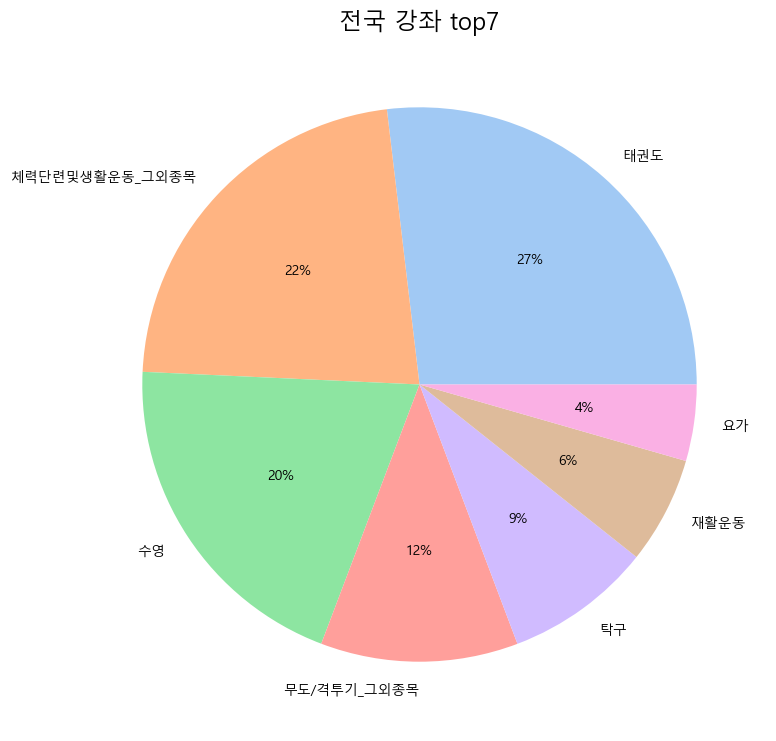

In [81]:
# 전국 top7 파이차트
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=10) 
fig = plt.figure(figsize=(10,9)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
colors = sns.color_palette('pastel')[0:7]


labels = course_cnt_top7['종목']
values = course_cnt_top7['cnt']

plt.pie(values, labels=labels, colors = colors, autopct='%.0f%%')
plt.title('전국 강좌 top7', fontsize = 17)

plt.rc('legend', fontsize=7) 


plt.show()

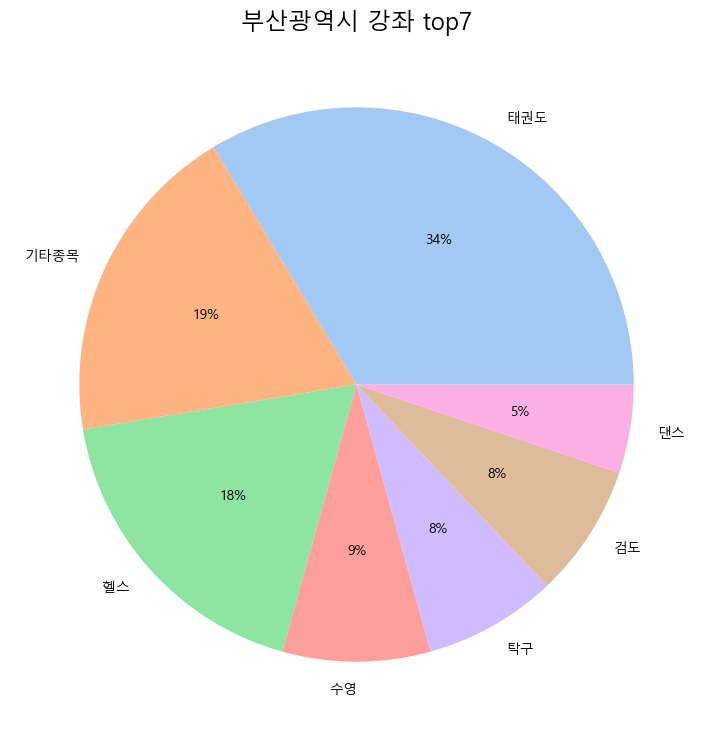

In [82]:
# 부산 top7 파이차트
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=10)  

fig = plt.figure(figsize=(10,9)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
colors = sns.color_palette('pastel')[0:7]


labels = busan_top7['종목']
values = busan_top7['cnt']

plt.pie(values, labels=labels, colors = colors, autopct='%.0f%%')
plt.title('부산광역시 강좌 top7', fontsize=17)


plt.show()

#### 부산광역시 장애인 유형 파악

In [4]:
ctg.rename(columns={'Unnamed: 11':'개수'},inplace = True)
ctg

,시도,시군구,장애유형,심한 장애,Unnamed: 4,Unnamed: 5,심하지 않은 장애,Unnamed: 7,Unnamed: 8,합계,Unnamed: 10,개수
0,NaN,NaN,NaN,남,여,합계,남,여,합계,남,여,합계
1,합계,합계,합계,586019,398794,984813,942261,717626,1659887,1528280,1116420,2644700
2,서울특별시,소계,소계,88778,59083,147861,138524,105738,244262,227302,164821,392123
3,서울특별시,종로구,소계,1317,889,2206,2109,1614,3723,3426,2503,5929
4,서울특별시,종로구,간,2,0,2,30,13,43,32,13,45
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,제주특별자치도,서귀포시,신장,218,128,346,56,31,87,274,159,433
4005,제주특별자치도,서귀포시,지체,583,314,897,1963,1819,3782,2546,2133,4679
4006,제주특별자치도,서귀포시,시각,110,134,244,592,444,1036,702,578,1280
4007,제주특별자치도,서귀포시,언어,38,19,57,26,18,44,64,37,101


In [5]:
ctg_bs = ctg[ctg['시도'] == '부산광역시']
ctg_bs = ctg_bs[ctg_bs['시군구'] != '소계']
ctg_bs = ctg_bs[['시도','시군구','장애유형','개수']]
ctg_bs = ctg_bs[ctg_bs['장애유형'] != '소계']
ctg_bs

,시도,시군구,장애유형,개수
405,부산광역시,중구,간,13
406,부산광역시,중구,뇌병변,281
407,부산광역시,중구,장루.요루,18
408,부산광역시,중구,심장,9
409,부산광역시,중구,지적,125
...,...,...,...,...
655,부산광역시,기장군,신장,360
656,부산광역시,기장군,지체,3950
657,부산광역시,기장군,시각,816
658,부산광역시,기장군,언어,88


In [6]:
ctg_bs = ctg_bs['개수'].astype(int)

In [7]:
ctg_bs = ctg[ctg['시도'] == '부산광역시']
ctg_bs

,시도,시군구,장애유형,심한 장애,Unnamed: 4,Unnamed: 5,심하지 않은 장애,Unnamed: 7,Unnamed: 8,합계,Unnamed: 10,개수
403,부산광역시,소계,소계,40616,26562,67178,63208,46065,109273,103824,72627,176451
404,부산광역시,중구,소계,549,344,893,946,785,1731,1495,1129,2624
405,부산광역시,중구,간,2,0,2,8,3,11,10,3,13
406,부산광역시,중구,뇌병변,81,61,142,84,55,139,165,116,281
407,부산광역시,중구,장루.요루,2,3,5,9,4,13,11,7,18
...,...,...,...,...,...,...,...,...,...,...,...,...
655,부산광역시,기장군,신장,159,115,274,57,29,86,216,144,360
656,부산광역시,기장군,지체,567,302,869,1779,1302,3081,2346,1604,3950
657,부산광역시,기장군,시각,64,77,141,397,278,675,461,355,816
658,부산광역시,기장군,언어,31,14,45,34,9,43,65,23,88


In [8]:
# 구별 정렬
ctg_bs=ctg_bs.sort_values(by=["시군구","개수"], ascending=[True,False])
ctg_bs = ctg_bs[['시도','시군구','장애유형','개수']]
ctg_bs

,시도,시군구,장애유형,개수
580,부산광역시,강서구,소계,5223
592,부산광역시,강서구,지체,2449
587,부산광역시,강서구,청각,658
582,부산광역시,강서구,뇌병변,528
593,부산광역시,강서구,시각,514
...,...,...,...,...
538,부산광역시,해운대구,호흡기,117
533,부산광역시,해운대구,간,110
542,부산광역시,해운대구,뇌전증,65
536,부산광역시,해운대구,심장,53


In [9]:
# 부산 전체 장애유형별 사람 수
ctg_bs = pd.DataFrame(ctg_bs.groupby('장애유형')['개수'].sum())
ctg_bs = ctg_bs.reset_index()
ctg_bs = ctg_bs.sort_values(by='개수', ascending=False)
ctg_bs = ctg_bs[1:]
ctg_bs

,장애유형,개수
13,지체,77016
14,청각,25371
1,뇌병변,19490
4,시각,17874
12,지적,12384
11,정신,8242
5,신장,8011
9,자폐성,2254
8,언어,1575
10,장루.요루,1134


#### 각 시설당 수용 가능 인원이 많은 구 선정 (Top5)

##### 전처리

In [85]:
busan_facility_top5 = busan_facility_top5.set_index('시군구',drop=False).drop(['시군구'],axis=1)

busan_1 = busan_facility_top5.iloc[:5]  # 선정된 구 5개
busan_2 = busan_facility_top5.iloc[5:]  # 장애인 전용 체육시설이 존재하는 구 3개

##### 시각화

In [86]:
map5 = folium.Map(location = [35.1856505,129.1], zoom_start=10, tiles = 'Stamen Terrain')
map5.choropleth(geo_data = geo_str, 
              fill_color = 'grey',
              fill_opacity=0.5,
              key_on = "feature.id")

for i in range(len(busan_1)):
    folium.Marker([busan_1.iloc[i][0], busan_1.iloc[i][1]], icon = folium.Icon(color = 'red')).add_to(map5)   
    
for i in range(len(busan_2)):
    folium.Marker([busan_2.iloc[i][0], busan_2.iloc[i][1]], icon = folium.Icon(color = 'black')).add_to(map5)     


map5

c:\Users\woo\anaconda3\lib\site-packages\folium\folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
